# Classification of Coffee Leaf Pests and Diseases

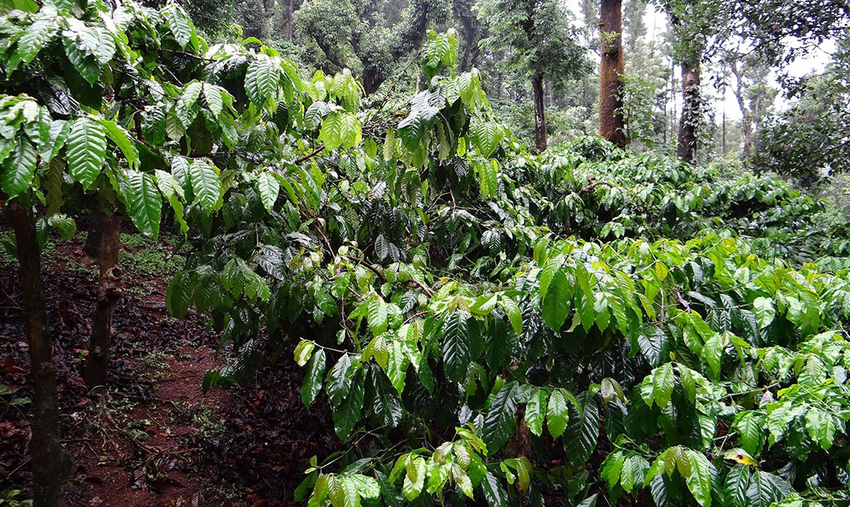

## Overview

Coffee farming is a global agricultural business that takes many forms from large to small farms and standardized to shade grown and organic. Coffee farming is a complex and intricate business, with millions of small-scale farmers relying on its cultivation for their income. However, this industry faces significant challenges, with coffee leaf diseases posing a constant threat to coffee crops. 
<br>
<br>
This project aims to create an image classification model that is able to identify symptoms of three different diseases and pests in coffee leaves and to distinguish them from images of healthy leaves. The benefit of this system is that it is simple, and would only require a smartphone camera to photograph leaves to identify the problem. On a larger scale, farms with more technology would also be able to quickly input larger quantities of photos into the model, creating something that would serve as a monitoring system for successful agricultural production. 

## Business Problem

Local communities in Ecuador are pooling resources and working with a local NGO, Somos Salud Integral, to start a series of organic, shade grown coffee farms in the Manabi region of coastal Ecuador. This system is being proposed to the stakeholders as a means to reduce their barrier to entry into this business because they will be ensured to have a system to monitor for disease and pests in their crops, minimizing risk of the business failing due to die off of plants. 
<br>
<br>
Coffee miner, which damages coffee leaves, and coffee rust, a highly contagious fungus that causes extensive leaf loss, lead to reduced coffee yields and inferior bean quality. Phoma, another fungal disease, contributes to further crop losses. These issues result in increased production costs, decreased profitability for coffee farmers, and potential price hikes for consumers. The economic consequences extend beyond the farm gate, affecting coffee trading, export, and the coffee supply chain. As a result, finding effective solutions to identify and combat these pests and diseases is crucial to ensure the sustainability and resilience of the coffee industry, safeguarding both the livelihoods of coffee growers and the availability of high-quality coffee for consumers worldwide.
<br>
<br>
An image classification model designed to identify coffee leaf pests and diseases such as coffee miner, coffee rust, and phoma offers a promising and impactful solution to the challenges faced by the coffee industry. By utilizing machine learning and computer vision, the model can rapidly detect the presence of these pests and diseases in coffee plants based on images of their leaves. Early detection allows for timely intervention, enabling farmers to take preventive measures, such as targeted pesticide application or the removal of affected plants, before the infestations spread. This proactive approach can significantly reduce crop damage and yield losses.
<br>
<br>
The model can pinpoint the specific type and severity of the infestation, allowing for precise and customized treatment strategies. This targeted approach minimizes the use of pesticides and resources while maximizing the effectiveness of interventions, reducing production costs, and minimizing environmental impacts.By identifying and addressing coffee leaf pests and diseases promptly, the model can help maintain healthier coffee plants. Healthy plants produce higher yields of better-quality beans, leading to increased income for coffee farmers and improved overall product quality in the market. Early detection translates to timely interventions, empowering farmers to take preventive measures such as precise pesticide application and targeted plant removal before the infestations escalate. Consequently, crop damage and yield losses are significantly reduced, resulting in healthier coffee plants that yield higher quantities of superior-quality beans. Moreover, the model's precision enables tailored treatment strategies, minimizing the environmental impact of pesticides and optimizing resource allocation. This innovation fosters cost savings, supports sustainable agricultural practices, and empowers coffee farmers with knowledge to protect their crops and livelihoods. Its potential for global deployment stands to benefit coffee producers across diverse regions, ensuring the industry's resilience and safeguarding the consistent supply of premium coffee for consumers worldwide. Ultimately, an image classification model for coffee leaf pests and diseases holds the promise of revolutionizing coffee farming, aligning economic prosperity with environmental sustainability.

## Data Understanding

The data for this project comes from a Kaggle dataset of 1216 training and 388 testing images of coffee leaves that are classified as either healthy or presenting one of three diseases: miner, rust, or phoma.

The Kaggel dataset can be found at this link: https://www.kaggle.com/datasets/badasstechie/coffee-leaf-diseases?resource=download

#### Coffee miner
Leucoptera coffeella, or the coffee leaf miner, is a moth found in South America, Central America, and the West Indies. It is a small moth, with an average adult wingspan of 6.5 millimeters (0.26 inches). The larvae of these moths feed on the leaves of the coffee plant, leaving them with brown necrotic spots. It is considered one of the worst pests of the coffee plant due to the large amount of damage it can inflict. 

#### Coffee rust
Hemileia vastatrix is a multicellular fungus that infects coffee plant leaves causing coffee leaf rust. It is an obligate host of the coffee leaf, meaning it relies on the plant and must come in contact with it to survive. It is one of the most economically important diseases that affects coffee plants worldwide. It can kill plants by covering leaves in its spores, which limits their ability to photosynthesize. This causes leaves to die and fall off, leading eventually to the inability of the whole plant to survive. 

#### Coffee phoma
Ascochyta tarda or Phoma tarda is a fungal plant pathogen that causes dieback and leaf spots in coffee plants. Dieback is a process by which plants begin to die beginning with the tips of the leaves shriveling and drying up. Cold climate, heavy rain, strong wind, and hail all increase the prevalence and damage caused by phoma. However, due to climate change and warming of the climate, it is becoming less common. 
<br>
<br>
The photos below show each disease of the coffee leaves, and it is evident in each that they are present themselves in distinct ways - the miner affected leaves have brown splotches, the rust affected have yellow, round spots, and the phoma affected may have brown spots, but primarily have tips that are shriveled. 

### Healthy<img src="coffee_data/images_sorted/test/test_healthy/1116.jpg" alt="healthy leaf" width="35%" height="auto">
### Miner <img src="coffee_data/images_sorted/test/test_miner/72.jpg" alt="healthy leaf" width="35%" height="auto">
### Rust <img src="coffee_data/images_sorted/test/test_rust/1122.jpg" alt="healthy leaf" width="35%" height="auto">
### Phoma <img src="coffee_data/images_sorted/test/test_phoma/512.jpg" alt="healthy leaf" width="35%" height="auto">

### Project Goal: 
To create a model that can differentiate between the 4 categories of leaves in the dataset and correctly predict 1) if a leaf is healthy and 2) if it is not, which disease is it showing physical signs of.

#### Imports

In [28]:
#Standard imports
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Tensorflow and keras imports
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout
from keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

#### Reading in data

In [155]:
# Reading in the csv that has the labels for the test and train images
test_labels = pd.read_csv('data/test_classes.csv')
train_labels = pd.read_csv('data/train_labels.csv')

In [123]:
test_labels.head()

,id,healthy,miner,phoma,rust
0,584,1,0,0,0
1,585,1,0,0,0
2,586,1,0,0,0
3,587,1,0,0,0
4,1116,1,0,0,0


In [156]:
len(test_labels)

388

In [157]:
len(train_labels)

1216

## Image sorting/organizing

- Here, I am sorting the image files into their own folders by test/train and disease status. I was planning to start off with my first model using a binary system with only healthy vs. non-healthy leaf images, but I decided later to instead do the entire project with 4 classes.

### Sorting by only healthy vs disease and test/train

In [59]:
#source_directory = "data/coffee-leaf-diseases/test/images"
#destination_directory = "data/test_alldisease"

#file_numbers_to_move = [64, 65, 66, 67, 68, 69, 70, 71, 72, 73,  74, 75, 76, 77, 78, 79, 80, 81, 82, 83,  84, 85, 86, 87, 88, 89, 90, 91, 92, 93,  94, 95, 96, 97, 98, 99, 1100, 1101, 1102,  1103, 1108, 1109, 1110, 1111, 1112, 1113,  1114, 1115, 1128, 1129, 1130, 1131, 1132,  1133, 1134, 1135, 1136, 1137, 1138, 1139,  1148, 1149, 1150, 1151, 1152, 1153, 1154,  1155, 1156, 1157, 1158, 1159, 1232, 1233,  1234, 1235, 1244, 1245, 1246, 1247, 1248,  1249, 1250, 1251, 1256, 1257, 1258, 1259,  1260, 1261, 1262, 1263, 1264, 1265, 1266,  1267, 1268, 1269, 1270, 1271, 1272, 1273,  1274, 1275, 1276, 1277, 1278, 1279, 1284,  1285, 1286, 1287, 1292, 1293, 1294, 1295, 1120, 1121, 1122, 1123, 1252, 1253, 1254, 1255, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1660, 1661, 1662, 1663, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,510, 511, 512, 513, 514, 515, 516, 517, 518, 519,520, 521, 522, 523, 524, 525, 526, 527, 528, 529,530, 531, 532, 533, 534, 535, 536, 537, 538, 539,540, 541, 542, 543, 544, 545, 546, 547, 548, 549,550, 551, 552, 553, 554, 555, 556, 557, 558, 559,560, 561, 562, 563, 564, 565, 566, 567, 568, 569,570, 571, 572, 573, 574, 575, 576, 577, 578, 579,580, 581, 582, 583, 588, 589, 590, 591, 592, 593,594, 595, 596, 597, 598, 599]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [5]:
#source_directory = "data/coffee-leaf-diseases/train/images"
#destination_directory = "data/train_alldisease"

#file_numbers_to_move = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 684, 685, 686, 687, 804, 805, 806, 807, 816, 817, 818, 819, 828, 829, 830, 831, 836, 837, 838, 839, 852, 853, 854, 855, 856, 857, 858, 859, 864, 865, 866, 867, 872, 873, 874, 875, 888, 889, 890, 891, 892, 893, 894, 895, 908, 909, 910, 911, 912, 913, 914, 915, 928, 929, 930, 931, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 992, 993, 994, 995, 1000, 1001, 1002, 1003, 1008, 1009, 1010, 1011, 1024, 1025, 1026, 1027, 1032, 1033, 1034, 1035, 1044, 1045, 1046, 1047, 1052, 1053, 1054, 1055, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1092, 1093, 1094, 1095, 1300, 1301, 1302, 1303, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1320, 1321, 1322, 1323, 1328, 1329, 1330, 1331, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1376, 1377, 1378, 1379, 1480, 1481, 1482, 1483, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1540, 1541, 1542, 1543, 1560, 1561, 1562, 1563, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 648, 649, 650, 651, 712, 713, 714, 715, 716, 717, 718, 719, 732, 733, 734, 735, 768, 769, 770, 771, 840, 841, 842, 843, 884, 885, 886, 887, 896, 897, 898, 899, 900, 901, 902, 903, 944, 945, 946, 947, 960, 961, 962, 963, 968, 969, 970, 971, 1028, 1029, 1030, 1031, 1040, 1041, 1042, 1043, 1088, 1089, 1090, 1091, 1348, 1349, 1350, 1351, 1372, 1373, 1374, 1375, 1432, 1433, 1434, 1435, 1440, 1441, 1442, 1443, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 17, 18, 19, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 708, 709, 710, 711, 728, 729, 730, 731, 736, 737, 738, 739, 756, 757, 758, 759, 772, 773, 774, 775, 780, 781, 782, 783, 784, 785, 786, 787, 796, 797, 798, 799, 800, 801, 802, 803, 808, 809, 810, 811, 820, 821, 822, 823]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

### Sorting by all three diseases, healthy and test/train

In [ ]:
#source_directory = "data/coffee-leaf-diseases/test/images"
#destination_directory = "data/test_miner"

#file_numbers_to_move = [64, 65, 66, 67, 68, 69, 70, 71, 72, 73,  74, 75, 76, 77, 78, 79, 80, 81, 82, 83,  84, 85, 86, 87, 88, 89, 90, 91, 92, 93,  94, 95, 96, 97, 98, 99, 1100, 1101, 1102,  1103, 1108, 1109, 1110, 1111, 1112, 1113,  1114, 1115, 1128, 1129, 1130, 1131, 1132,  1133, 1134, 1135, 1136, 1137, 1138, 1139,  1148, 1149, 1150, 1151, 1152, 1153, 1154,  1155, 1156, 1157, 1158, 1159, 1232, 1233,  1234, 1235, 1244, 1245, 1246, 1247, 1248,  1249, 1250, 1251, 1256, 1257, 1258, 1259,  1260, 1261, 1262, 1263, 1264, 1265, 1266,  1267, 1268, 1269, 1270, 1271, 1272, 1273,  1274, 1275, 1276, 1277, 1278, 1279, 1284,  1285, 1286, 1287, 1292, 1293, 1294, 1295]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [ ]:
#source_directory = "data/coffee-leaf-diseases/test/images"
#destination_directory = "data/images_sorted/test_rust"

#file_numbers_to_move = [1120, 1121, 1122, 1123, 1252, 1253, 1254, 1255, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1660, 1661, 1662, 1663]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [ ]:
#source_directory = "data/coffee-leaf-diseases/test/images"
#destination_directory = "data/images_sorted/test_phoma"

#file_numbers_to_move = [500, 501, 502, 503, 504, 505, 506, 507, 508, 509,510, 511, 512, 513, 514, 515, 516, 517, 518, 519,520, 521, 522, 523, 524, 525, 526, 527, 528, 529,530, 531, 532, 533, 534, 535, 536, 537, 538, 539,540, 541, 542, 543, 544, 545, 546, 547, 548, 549,550, 551, 552, 553, 554, 555, 556, 557, 558, 559,560, 561, 562, 563, 564, 565, 566, 567, 568, 569,570, 571, 572, 573, 574, 575, 576, 577, 578, 579,580, 581, 582, 583, 588, 589, 590, 591, 592, 593,594, 595, 596, 597, 598, 599]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [6]:
#source_directory = "data/coffee-leaf-diseases/test/images"
#destination_directory = "data/images_sorted/test_healthy"

#file_numbers_to_move = [584, 585, 586, 587, 1116, 1117, 1118, 1119, 1124, 1125, 1126, 1127, 1144, 1145, 1146, 1147, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1288, 1289, 1290, 1291, 1296, 1297, 1298, 1299, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1656, 1657, 1658, 1659]

# Ensure the destination directory exists
#os.makedirs(destination_directory, exist_ok=True)

# Move files
#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [53]:
#source_directory = "data/coffee-leaf-diseases/train/images"
#destination_directory = "data/images_sorted/train_miner"

#file_numbers_to_move = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 684, 685, 686, 687, 804, 805, 806, 807, 816, 817, 818, 819, 828, 829, 830, 831, 836, 837, 838, 839, 852, 853, 854, 855, 856, 857, 858, 859, 864, 865, 866, 867, 872, 873, 874, 875, 888, 889, 890, 891, 892, 893, 894, 895, 908, 909, 910, 911, 912, 913, 914, 915, 928, 929, 930, 931, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 992, 993, 994, 995, 1000, 1001, 1002, 1003, 1008, 1009, 1010, 1011, 1024, 1025, 1026, 1027, 1032, 1033, 1034, 1035, 1044, 1045, 1046, 1047, 1052, 1053, 1054, 1055, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1092, 1093, 1094, 1095, 1300, 1301, 1302, 1303, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1320, 1321, 1322, 1323, 1328, 1329, 1330, 1331, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1376, 1377, 1378, 1379, 1480, 1481, 1482, 1483, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1540, 1541, 1542, 1543, 1560, 1561, 1562, 1563]

#os.makedirs(destination_directory, exist_ok=True)

#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [54]:
#source_directory = "data/coffee-leaf-diseases/train/images"
#destination_directory = "data/images_sorted/train_rust"

#file_numbers_to_move = [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 648, 649, 650, 651, 712, 713, 714, 715, 716, 717, 718, 719, 732, 733, 734, 735, 768, 769, 770, 771, 840, 841, 842, 843, 884, 885, 886, 887, 896, 897, 898, 899, 900, 901, 902, 903, 944, 945, 946, 947, 960, 961, 962, 963, 968, 969, 970, 971, 1028, 1029, 1030, 1031, 1040, 1041, 1042, 1043, 1088, 1089, 1090, 1091, 1348, 1349, 1350, 1351, 1372, 1373, 1374, 1375, 1432, 1433, 1434, 1435, 1440, 1441, 1442, 1443, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599]

#os.makedirs(destination_directory, exist_ok=True)

#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [55]:
#source_directory = "data/coffee-leaf-diseases/train/images"
#destination_directory = "data/images_sorted/train_phoma"

#file_numbers_to_move = [16, 17, 18, 19, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 708, 709, 710, 711, 728, 729, 730, 731, 736, 737, 738, 739, 756, 757, 758, 759, 772, 773, 774, 775, 780, 781, 782, 783, 784, 785, 786, 787, 796, 797, 798, 799, 800, 801, 802, 803, 808, 809, 810, 811, 820, 821, 822, 823]

#os.makedirs(destination_directory, exist_ok=True)

#for file_number in file_numbers_to_move:
 #   source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
  #  if os.path.exists(source_file):
   #     destination_file = os.path.join(destination_directory, os.path.basename(source_file))
    #    shutil.move(source_file, destination_file)

In [56]:
#source_directory = "data/coffee-leaf-diseases/train/images"
#destination_directory = "data/images_sorted/train_healthy"

#file_numbers_to_move = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 720, 721, 722, 723, 724, 725, 726, 727, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 760, 761, 762, 763, 764, 765, 766, 767, 776, 777, 778, 779, 788, 789, 790, 791, 792, 793, 794, 795, 812, 813, 814, 815, 824, 825, 826, 827, 832, 833, 834, 835, 844, 845, 846, 847, 848, 849, 850, 851, 860, 861, 862, 863, 868, 869, 870, 871, 904, 905, 906, 907, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 932, 933, 934, 935, 940, 941, 942, 943, 964, 965, 966, 967, 996, 997, 998, 999, 1004, 1005, 1006, 1007, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1036, 1037, 1038, 1039, 1048, 1049, 1050, 1051, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1076, 1077, 1078, 1079, 1096, 1097, 1098, 1099, 1304, 1305, 1306, 1307, 1316, 1317, 1318, 1319, 1324, 1325, 1326, 1327, 1332, 1333, 1334, 1335, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1584, 1585, 1586, 1587]

#os.makedirs(destination_directory, exist_ok=True)

#for file_number in file_numbers_to_move:
   # source_file = os.path.join(source_directory, f"{file_number}.jpg")  # Adjust the file extension if needed
    #if os.path.exists(source_file):
     #   destination_file = os.path.join(destination_directory, os.path.basename(source_file))
      #  shutil.move(source_file, destination_file)

#### Formatting the images for modeling

In [73]:
# Image directory paths

# all diseases combined
#test_disease_dir = 'data/test_alldisease'
#train_disease_dir = 'data/train_alldisease'

# healthy
#test_healthy_dir = 'data/images_sorted/test_healthy'
#train_healthy_dir = 'data/images_sorted/train_healthy'

# test individual diseases
#test_miner_dir = 'data/images_sorted/'
#test_rust_dir = 'data/images_sorted/test_rust'
#test_phoma_dir = 'data/images_sorted/test_phoma'

# train individual diseases
#train_miner_dir = 'data/images_sorted/train_miner'
#train_rust_dir = 'data/images_sorted/train_rust'
#train_stoma_dir = 'data/images_sorted/train_phoma'

#### Image directory paths

In [108]:
test_dir = 'data/images_sorted/test'
train_dir = 'data/images_sorted/train'

## Modeling

 - The first step in image classification is to create data generators for the training data, test data, and validation data which is a subset of the training data. 

In [135]:
# Data generator for test data
test_generator = ImageDataGenerator().flow_from_directory(
        test_dir, target_size=(64, 64), class_mode='categorical')

test_images = next(test_generator)

Found 388 images belonging to 4 classes.


In [125]:
test_labels

,id,healthy,miner,phoma,rust
0,584,1,0,0,0
1,585,1,0,0,0
2,586,1,0,0,0
3,587,1,0,0,0
4,1116,1,0,0,0
...,...,...,...,...,...
383,1655,0,0,0,1
384,1660,0,0,0,1
385,1661,0,0,0,1
386,1662,0,0,0,1


- The test labels from the test_generator wasn't working, was only producing 32 labels when there are 388 images. So, I made the labels separately and made sure that they matched the format and order for the image files in the generator.

In [158]:
class_columns = test_labels[['healthy', 'miner', 'phoma', 'rust']].values

# Use NumPy to compute the labels based on the maximum value in each row
test_labels_final = np.argmax(class_columns, axis=1)

In [159]:
class_columns_train = train_labels[['healthy', 'miner', 'phoma', 'rust']].values

# Use NumPy to compute the labels based on the maximum value in each row
train_labels_final = np.argmax(class_columns_train, axis=1)

In [162]:
len(train_labels_final)

1216

In [121]:
test_generator.filenames

['test_healthy\\1116.jpg',
 'test_healthy\\1117.jpg',
 'test_healthy\\1118.jpg',
 'test_healthy\\1119.jpg',
 'test_healthy\\1124.jpg',
 'test_healthy\\1125.jpg',
 'test_healthy\\1126.jpg',
 'test_healthy\\1127.jpg',
 'test_healthy\\1144.jpg',
 'test_healthy\\1145.jpg',
 'test_healthy\\1146.jpg',
 'test_healthy\\1147.jpg',
 'test_healthy\\1160.jpg',
 'test_healthy\\1161.jpg',
 'test_healthy\\1162.jpg',
 'test_healthy\\1163.jpg',
 'test_healthy\\1164.jpg',
 'test_healthy\\1165.jpg',
 'test_healthy\\1166.jpg',
 'test_healthy\\1167.jpg',
 'test_healthy\\1168.jpg',
 'test_healthy\\1169.jpg',
 'test_healthy\\1170.jpg',
 'test_healthy\\1171.jpg',
 'test_healthy\\1172.jpg',
 'test_healthy\\1173.jpg',
 'test_healthy\\1174.jpg',
 'test_healthy\\1175.jpg',
 'test_healthy\\1176.jpg',
 'test_healthy\\1177.jpg',
 'test_healthy\\1178.jpg',
 'test_healthy\\1179.jpg',
 'test_healthy\\1180.jpg',
 'test_healthy\\1181.jpg',
 'test_healthy\\1182.jpg',
 'test_healthy\\1183.jpg',
 'test_healthy\\1184.jpg',
 

In [ ]:
# Doing this because the test labels have 400 rows when they should have 388
test_labels = test_labels[test_labels['sum'] !=2]

In [163]:
# Data generator for train data
train_generator = ImageDataGenerator().flow_from_directory(train_dir, target_size=(64, 64), class_mode='categorical')

train_images = next(train_generator)

Found 1216 images belonging to 4 classes.


In [164]:
# Number given to each class in the dataset
train_generator.class_indices

{'train_healthy': 0, 'train_miner': 1, 'train_phoma': 2, 'train_rust': 3}

In [165]:
len(train_labels)

1216

In [153]:
train_generator.filenames

['train_healthy\\0.jpg',
 'train_healthy\\1.jpg',
 'train_healthy\\10.jpg',
 'train_healthy\\1004.jpg',
 'train_healthy\\1005.jpg',
 'train_healthy\\1006.jpg',
 'train_healthy\\1007.jpg',
 'train_healthy\\1012.jpg',
 'train_healthy\\1013.jpg',
 'train_healthy\\1014.jpg',
 'train_healthy\\1015.jpg',
 'train_healthy\\1016.jpg',
 'train_healthy\\1017.jpg',
 'train_healthy\\1018.jpg',
 'train_healthy\\1019.jpg',
 'train_healthy\\1036.jpg',
 'train_healthy\\1037.jpg',
 'train_healthy\\1038.jpg',
 'train_healthy\\1039.jpg',
 'train_healthy\\1048.jpg',
 'train_healthy\\1049.jpg',
 'train_healthy\\1050.jpg',
 'train_healthy\\1051.jpg',
 'train_healthy\\1056.jpg',
 'train_healthy\\1057.jpg',
 'train_healthy\\1058.jpg',
 'train_healthy\\1059.jpg',
 'train_healthy\\1060.jpg',
 'train_healthy\\1061.jpg',
 'train_healthy\\1062.jpg',
 'train_healthy\\1063.jpg',
 'train_healthy\\1064.jpg',
 'train_healthy\\1065.jpg',
 'train_healthy\\1066.jpg',
 'train_healthy\\1067.jpg',
 'train_healthy\\1076.jpg',


In [154]:
for filename in train_generator.filenames:
    print(filename)

train_healthy\0.jpg
train_healthy\1.jpg
train_healthy\10.jpg
train_healthy\1004.jpg
train_healthy\1005.jpg
train_healthy\1006.jpg
train_healthy\1007.jpg
train_healthy\1012.jpg
train_healthy\1013.jpg
train_healthy\1014.jpg
train_healthy\1015.jpg
train_healthy\1016.jpg
train_healthy\1017.jpg
train_healthy\1018.jpg
train_healthy\1019.jpg
train_healthy\1036.jpg
train_healthy\1037.jpg
train_healthy\1038.jpg
train_healthy\1039.jpg
train_healthy\1048.jpg
train_healthy\1049.jpg
train_healthy\1050.jpg
train_healthy\1051.jpg
train_healthy\1056.jpg
train_healthy\1057.jpg
train_healthy\1058.jpg
train_healthy\1059.jpg
train_healthy\1060.jpg
train_healthy\1061.jpg
train_healthy\1062.jpg
train_healthy\1063.jpg
train_healthy\1064.jpg
train_healthy\1065.jpg
train_healthy\1066.jpg
train_healthy\1067.jpg
train_healthy\1076.jpg
train_healthy\1077.jpg
train_healthy\1078.jpg
train_healthy\1079.jpg
train_healthy\1096.jpg
train_healthy\1097.jpg
train_healthy\1098.jpg
train_healthy\1099.jpg
train_healthy\11.jp

In [47]:
# Data generator for validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    class_mode='categorical',
    subset='validation')

Found 241 images belonging to 4 classes.


In [91]:
# Number given to each class in the dataset
validation_generator.class_indices

{'train_healthy': 0, 'train_miner': 1, 'train_phoma': 2, 'train_rust': 3}

In [7]:
#Shape for train and test generators
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(1216, 64, 64, 3)
(1216, 4)
(388, 64, 64, 3)
(388, 4)


#### Model Selection
I worked through several different iterations of models before reaching the final. First I created a dummy model as a baseline to see what the accuracy would be. Next, I started working on Sequential models using tensorflow keras, changing parameters to improve the model. A Sequential model is a good choice for image classification tasks due to its simplicity and versatility. They offer a straightforward interface for adding layers, making it ideal for building custom architectures tailored to specific image classification challenges while benefiting from the automatic gradient computation and optimization capabilities provided by deep learning frameworks in tensorFlow and keras.
<br>
<br>
I used a grid search as well to improve the Sequential model, but ultimately I wasn't happy with the final accuracies I was able to achieve so I decided to switch to a Convolutional Neural Network (CNN). Using a CNN for image classification offers advantages by leveraging specialized convolutional layers to automatically learn and extract hierarchical features from images. This enables CNNs to capture intricate patterns and spatial relationships within images, making them highly effective for tasks like image classification.
<br>
<br>
The final model I concluded with is a pretrained CNN model called VGG16 that has 16 layers. Pretrained models have pretrained weights for networks, so the hierarchies are already assigned to what a type of image would need, allowing them to be a lot more complex and run a lot faster than if I made the same model myself. The validation loss achieved is pretty low (0.0784), meaning that the model is able to predict the class of new data well, but the training data loss (0.2531) is a little higher. However, the fact that the validation loss is lower than the training is a positive indicator suggesting the model is generalizing well to new data. The training accuracy I got for this model is 0.9104 and the validation accuracy is 0.9876.

## Dummy Model

In [46]:
# Create a sequential model
dummy_model = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), 
    layers.Dense(4, activation='softmax')
])

dummy_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

dummy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 1,573,508
Trainable params: 1,573,508
Non-trainable params: 0
_________________________________________________________________


In [49]:
dummy_model.fit(train_generator, epochs=10, batch_size=32, validation_data=validation_generator)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 1.5357 - accuracy: 0.2426 - val_loss: 27.7335 - val_accuracy: 0.3195
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 27.4969 - accuracy: 0.3191 - val_loss: 15.5894 - val_accuracy: 0.2324
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 15.2735 - accuracy: 0.2336 - val_loss: 12.1739 - val_accuracy: 0.2158
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 12.0699 - accuracy: 0.2138 - val_loss: 7.1672 - val_accuracy: 0.2158
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 7.1247 - accuracy: 0.2138 - val_loss: 7.1290 - val_accuracy: 0.3195
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 7.1901 - accuracy: 0.3191 - val_loss: 5.3817 - val_accuracy: 0.3195
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 5.5135 - accuracy: 0.3191 - val_loss: 3.3829 - val_accuracy: 0.3859
Epoch 8/10
1/1 [===================

- The dummy model tells us what is the baseline accuracy that we can improve from. I know my following models are working if they have accuracies that are higher than those of the dummy model.

#### Accuracy after 10 epochs: 0.3355

In [62]:
#save model
dummy_model.save('dummy_model.h5')

## First Simple Model with Sequential

I began with a simple Sequential model to see what the baseline accuracy of a model could be. The epochs were set to 10, to reduce the amount of time needed to run the model, and the batch size was set to the size of the total training data. I also began with using the test data as the validation data for the model.

In [56]:
#Basic Sequential Model
basicseq_model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')])

In [57]:
basicseq_model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
bs_history = basicseq_model.fit(train_generator, epochs=50, batch_size=32, validation_data=test_generator)

Epoch 1/50
1/1 [==============================] - 16s 16s/step - loss: 1.3815 - accuracy: 0.3191 - val_loss: 1.3807 - val_accuracy: 0.2474
Epoch 2/50
1/1 [==============================] - 9s 9s/step - loss: 1.3814 - accuracy: 0.3191 - val_loss: 1.3806 - val_accuracy: 0.2474
Epoch 3/50
1/1 [==============================] - 9s 9s/step - loss: 1.3812 - accuracy: 0.3191 - val_loss: 1.3805 - val_accuracy: 0.2474
Epoch 4/50
1/1 [==============================] - 9s 9s/step - loss: 1.3811 - accuracy: 0.3191 - val_loss: 1.3804 - val_accuracy: 0.2474
Epoch 5/50
1/1 [==============================] - 9s 9s/step - loss: 1.3809 - accuracy: 0.3191 - val_loss: 1.3803 - val_accuracy: 0.2474
Epoch 6/50
1/1 [==============================] - 9s 9s/step - loss: 1.3808 - accuracy: 0.3191 - val_loss: 1.3802 - val_accuracy: 0.2474
Epoch 7/50
1/1 [==============================] - 8s 8s/step - loss: 1.3807 - accuracy: 0.3191 - val_loss: 1.3801 - val_accuracy: 0.2474
Epoch 8/50
1/1 [=======================

In [64]:
# Save model
basicseq_model.save('basicseq_model.h5')

In [ ]:
# Break out loss and accuracy values from model
bs_train_loss = bs_history.history['loss']
bs_val_loss = bs_history.history['val_loss']
bs_train_accuracy = bs_history.history['accuracy']
bs_val_accuracy = bs_history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

#Plot configuration
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, bs_train_loss, 'r', label='Training Loss')
plt.plot(epochs, bs_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, bs_train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, bs_val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Sequential Basic Model output
Epoch 1/10 <br>
1/1 [==============================] - 15s 15s/step - loss: 155.4254 - accuracy: 0.2508 - val_loss: 2155.2666 - val_accuracy: 0.1546<br>
Epoch 2/10<br>
1/1 [==============================] - 7s 7s/step - loss: 2181.4651 - accuracy: 0.2220 - val_loss: 1588.6763 - val_accuracy: 0.2474<br>
Epoch 3/10<br>
1/1 [==============================] - 7s 7s/step - loss: 1581.7423 - accuracy: 0.2804 - val_loss: 780.1645 - val_accuracy: 0.2474<br>
Epoch 4/10<br>
1/1 [==============================] - 7s 7s/step - loss: 1153.6689 - accuracy: 0.2747 - val_loss: 244.3083 - val_accuracy: 0.2474<br>
Epoch 5/10<br>
1/1 [==============================] - 7s 7s/step - loss: 803.9022 - accuracy: 0.2780 - val_loss: 227.4098 - val_accuracy: 0.1598<br>
Epoch 6/10<br>
1/1 [==============================] - 7s 7s/step - loss: 732.5523 - accuracy: 0.2516 - val_loss: 278.3878 - val_accuracy: 0.1546<br>
Epoch 7/10<br>
1/1 [==============================] - 7s 7s/step - loss: 695.1899 - accuracy: 0.2393 - val_loss: 243.9597 - val_accuracy: 0.1546<br>
Epoch 8/10<br>
1/1 [==============================] - 7s 7s/step - loss: 504.0084 - accuracy: 0.2590 - val_loss: 178.8279 - val_accuracy: 0.1546<br>
Epoch 9/10<br>
1/1 [==============================] - 7s 7s/step - loss: 396.0859 - accuracy: 0.2541 - val_loss: 120.1407 - val_accuracy: 0.1546<br>
Epoch 10/10<br>
1/1 [==============================] - 7s 7s/step - loss: 346.3645 - accuracy: 0.2648 - val_loss: 68.1425 - val_accuracy: 0.1753
<br>
<br><tensorflow.python.keras.callbacks.History at 0x29bba7b5970>

## Grid Search

In [54]:
def create_model(learning_rate=0.01, dropout_rate=0.5, units=128):
    model = keras.Sequential([
        layers.Flatten(input_shape=(64, 64, 3)),
        layers.Dense(units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [63]:
param_grid = {
    'learning_rate': [0.0001],
    'dropout_rate': [0.1],
    'units': [80, 90, 100]}

In [64]:
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=10, batch_size=388)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)


In [65]:
grid_search.fit(train_images, train_labels)


Epoch 1/10
26/26 [==============================] - 0s 7ms/step - loss: 91.0624 - accuracy: 0.2815
Epoch 2/10
26/26 [==============================] - 0s 7ms/step - loss: 32.4003 - accuracy: 0.3086
Epoch 3/10
26/26 [==============================] - 0s 8ms/step - loss: 21.3354 - accuracy: 0.3086
Epoch 4/10
26/26 [==============================] - 0s 8ms/step - loss: 5.0641 - accuracy: 0.2469
Epoch 5/10
26/26 [==============================] - 0s 8ms/step - loss: 1.3887 - accuracy: 0.2506
Epoch 6/10
26/26 [==============================] - 0s 7ms/step - loss: 1.3850 - accuracy: 0.3198
Epoch 7/10
26/26 [==============================] - 0s 7ms/step - loss: 1.3850 - accuracy: 0.3198
Epoch 8/10
26/26 [==============================] - 0s 8ms/step - loss: 1.3847 - accuracy: 0.3198
Epoch 9/10
26/26 [==============================] - 0s 8ms/step - loss: 1.3842 - accuracy: 0.3198
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.3177
Epoch 1/10
26/26

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CF1CC8E2E0>,
             param_grid={'dropout_rate': [0.1], 'learning_rate': [0.0001],
                         'units': [80, 90, 100]})

Epoch 1/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 91.0624 - accuracy: 0.2815<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 32.4003 - accuracy: 0.3086<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 21.3354 - accuracy: 0.3086<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 5.0641 - accuracy: 0.2469<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3887 - accuracy: 0.2506<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3850 - accuracy: 0.3198<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3850 - accuracy: 0.3198<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3847 - accuracy: 0.3198<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3842 - accuracy: 0.3198<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3842 - accuracy: 0.3198<br>
13/13 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.3177<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 102.9871 - accuracy: 0.2602<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 21.3849 - accuracy: 0.2885<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.5606 - accuracy: 0.2799<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3859 - accuracy: 0.3305<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3856 - accuracy: 0.3305<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3852 - accuracy: 0.3305<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3848 - accuracy: 0.3305<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3845 - accuracy: 0.3305<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3842 - accuracy: 0.3305<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3838 - accuracy: 0.3305<br>
13/13 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2963<br>
Epoch 1/10<br>
26/26 [==============================] - ETA: 0s - loss: 59.7488 - accuracy: 0.259 - 0s 7ms/step - loss: 57.9647 - accuracy: 0.2626<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 12.7578 - accuracy: 0.2947<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.4493 - accuracy: 0.2195<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3861 - accuracy: 0.3070<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 1.3859 - accuracy: 0.3070<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3857 - accuracy: 0.3070<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3855 - accuracy: 0.3070<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3854 - accuracy: 0.3070<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3852 - accuracy: 0.3070<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3850 - accuracy: 0.3070<br>
13/13 [==============================] - 0s 3ms/step - loss: 1.3883 - accuracy: 0.3407<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 86.6233 - accuracy: 0.2827<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 35.7397 - accuracy: 0.3000<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 19.1680 - accuracy: 0.3259<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 13.5964 - accuracy: 0.2938<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3849 - accuracy: 0.2235<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3860 - accuracy: 0.2988<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3850 - accuracy: 0.3210<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3847 - accuracy: 0.3210<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3844 - accuracy: 0.3210<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3842 - accuracy: 0.3210<br>
13/13 [==============================] - 0s 3ms/step - loss: 1.3847 - accuracy: 0.3177<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 69.4252 - accuracy: 0.2713<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 27.5868 - accuracy: 0.3120<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 10.4639 - accuracy: 0.3132<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 4.2349 - accuracy: 0.2799<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3860 - accuracy: 0.2577<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3855 - accuracy: 0.3305<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 1.3850 - accuracy: 0.3305<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 1.3846 - accuracy: 0.3305<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3842 - accuracy: 0.3305<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 1.3838 - accuracy: 0.3305<br>
13/13 [==============================] - 0s 3ms/step - loss: 1.3849 - accuracy: 0.2963<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 64.0950 - accuracy: 0.2552<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 25.9225 - accuracy: 0.2984<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 14.1557 - accuracy: 0.2959<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 2.2401 - accuracy: 0.2540<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3864 - accuracy: 0.2133<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3862 - accuracy: 0.2330<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3860 - accuracy: 0.3070<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3859 - accuracy: 0.3070<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3857 - accuracy: 0.3070<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3856 - accuracy: 0.3070<br>
13/13 [==============================] - 0s 3ms/step - loss: 1.4130 - accuracy: 0.3383<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 91.4817 - accuracy: 0.2494<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 23.9498 - accuracy: 0.3148<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 17.0525 - accuracy: 0.2938<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 8.6614 - accuracy: 0.3111<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.4150 - accuracy: 0.2235<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3864 - accuracy: 0.2185<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3863 - accuracy: 0.2185<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3861 - accuracy: 0.2383<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3859 - accuracy: 0.3198<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3858 - accuracy: 0.3198<br>
13/13 [==============================] - 0s 4ms/step - loss: 1.3904 - accuracy: 0.3177<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 85.8944 - accuracy: 0.2737<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 27.9452 - accuracy: 0.3046<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 9ms/step - loss: 8.9711 - accuracy: 0.3218<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 2.3330 - accuracy: 0.2306<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3902 - accuracy: 0.2392<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3846 - accuracy: 0.3255<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3841 - accuracy: 0.3305<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3838 - accuracy: 0.3305<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3835 - accuracy: 0.3305<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3832 - accuracy: 0.3305<br>
13/13 [==============================] - 0s 4ms/step - loss: 1.3854 - accuracy: 0.2963<br>
Epoch 1/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 88.0731 - accuracy: 0.2503<br>
Epoch 2/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 34.6668 - accuracy: 0.2577<br>
Epoch 3/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 15.8797 - accuracy: 0.2725<br>
Epoch 4/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.5666 - accuracy: 0.2972<br>
Epoch 5/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3860 - accuracy: 0.3070<br>
Epoch 6/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3858 - accuracy: 0.3070<br>
Epoch 7/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3857 - accuracy: 0.3070<br>
Epoch 8/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3855 - accuracy: 0.3070<br>
Epoch 9/10<br>
26/26 [==============================] - 0s 8ms/step - loss: 1.3853 - accuracy: 0.3070<br>
Epoch 10/10<br>
26/26 [==============================] - 0s 7ms/step - loss: 1.3852 - accuracy: 0.3070<br>
13/13 [==============================] - 0s 4ms/step - loss: 1.3832 - accuracy: 0.3457<br>
Epoch 1/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 101.3189 - accuracy: 0.2919<br>
Epoch 2/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 27.9783 - accuracy: 0.3215<br>
Epoch 3/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 7.1164 - accuracy: 0.3207<br>
Epoch 4/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3852 - accuracy: 0.3298<br>
Epoch 5/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.4115 - accuracy: 0.3298<br>
Epoch 6/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3828 - accuracy: 0.3215<br>
Epoch 7/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3828 - accuracy: 0.3215<br>
Epoch 8/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3820 - accuracy: 0.3215<br>
Epoch 9/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3828 - accuracy: 0.3207<br>
Epoch 10/10<br>
38/38 [==============================] - 0s 8ms/step - loss: 1.3821 - accuracy: 0.3207<br>
<br>
GridSearchCV(cv=3,<br>
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CF1CC8E2E0>,<br>
             param_grid={'dropout_rate': [0.1], 'learning_rate': [0.0001],<br>
                         'units': [80, 90, 100]})

In [67]:
#best_params = grid_search.best_params_
#best_accuracy = grid_search.best_score_

#print("Best Hyperparameters:", best_params)
#print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'dropout_rate': 0.1, 'learning_rate': 0.0001, 'units': 100}
Best Accuracy: 0.31990310549736023


#### Grid Search best parameters
Best Hyperparameters: {'dropout_rate': 0.1, 'learning_rate': 0.0001, 'units': 100}<br>
Best Accuracy: 0.31990310549736023

In [15]:
def create_model2(learning_rate=0.0001, dropout_rate=0.1, units=100):
    model = keras.Sequential([
        layers.Flatten(input_shape=(64, 64, 3)),
        layers.Dense(units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### Model 2 from grid search results

In [16]:
model2 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model2, epochs=10, batch_size=388)

In [17]:
# Create a KerasClassifier wrapper for your model
from keras.wrappers.scikit_learn import KerasClassifier
model2 = KerasClassifier(build_fn=create_model2, epochs=10, batch_size=32)  # Replace 'create_model' with your model creation function

# Perform cross-validation
scores = cross_val_score(model2, train_images, train_labels, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores (accuracy)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Epoch 1/10
31/31 [==============================] - 0s 8ms/step - loss: 76.9834 - accuracy: 0.3066
Epoch 2/10
31/31 [==============================] - 0s 8ms/step - loss: 20.4198 - accuracy: 0.3076
Epoch 3/10
31/31 [==============================] - 0s 9ms/step - loss: 4.6539 - accuracy: 0.2747
Epoch 4/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3809 - accuracy: 0.3004
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3907 - accuracy: 0.3189
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3827 - accuracy: 0.3179
Epoch 7/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3821 - accuracy: 0.3189
Epoch 8/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3830 - accuracy: 0.3210
Epoch 9/10
31/31 [==============================] - 0s 8ms/step - loss: 1.3830 - accuracy: 0.3189
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 1.4058 - accuracy: 0.3279
Epoch 1/10
31/31 [=

### Tuning first model and adding validation set from training data

CNN

backbone with head
pull in convulutional and max weights

#### Changes made for model tuning:
- Reduced batch size to allow for better training to occur with less epochs <br>
- Created a validation split as a subset of the training data instead of using the test data for validation <br>
- Added more epochs to increase training of model

In [65]:
train_dir = 'data/images_sorted/train'

# Data generator with validation split
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

# Data generator for training data with validation split
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    class_mode='categorical',
    subset='training')

# Data generator for validation data with validation split
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    class_mode='categorical',
    subset='validation')

Found 975 images belonging to 4 classes.
Found 241 images belonging to 4 classes.


In [69]:
seq2_model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

seq2_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use the training and validation generators for training
seq2_history = seq2_model.fit(
    train_generator,
    epochs=50, batch_size=16, 
    validation_data=validation_generator)


Epoch 1/50
31/31 [==============================] - 26s 835ms/step - loss: 2.5527 - accuracy: 0.2421 - val_loss: 1.3862 - val_accuracy: 0.2282
Epoch 2/50
31/31 [==============================] - 25s 805ms/step - loss: 1.3858 - accuracy: 0.3169 - val_loss: 1.3841 - val_accuracy: 0.3195
Epoch 3/50
31/31 [==============================] - 24s 790ms/step - loss: 1.3831 - accuracy: 0.3190 - val_loss: 1.3819 - val_accuracy: 0.3195
Epoch 4/50
31/31 [==============================] - 26s 831ms/step - loss: 1.3811 - accuracy: 0.3190 - val_loss: 1.3800 - val_accuracy: 0.3195
Epoch 5/50
31/31 [==============================] - 25s 810ms/step - loss: 1.3794 - accuracy: 0.3190 - val_loss: 1.3787 - val_accuracy: 0.3195
Epoch 6/50
31/31 [==============================] - 26s 832ms/step - loss: 1.3781 - accuracy: 0.3190 - val_loss: 1.3774 - val_accuracy: 0.3195
Epoch 7/50
31/31 [==============================] - 25s 808ms/step - loss: 1.3769 - accuracy: 0.3190 - val_loss: 1.3765 - val_accuracy: 0.3195

In [ ]:
# Save model
seq2_model.save('seq2_model.h5')

#### Results:
- Model accuracy did improve overall, to final accuracy in epoch 50/50 of 0.3190
- However, accuracy stopped improving after 3rd epoch

#### Adjust model to see why the accuracy was stagnant after 3rd epoch

- Here, I am implementing the lr_scheduler, learning rate scheduler, to reduce the learning rate if the accuracy does not improve after 3 epochs. This will hopefully fix the problem in the previous model where the accuracy stopped increasing after the 3rd epoch. 

In [71]:
seq3_model = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

seq3_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use the training and validation generators for training
seq3_history = seq3_model.fit(
    train_generator,
    epochs=50, batch_size=16, 
    validation_data=validation_generator, callbacks=[lr_scheduler])


Epoch 1/50
31/31 [==============================] - 25s 820ms/step - loss: 2.5566 - accuracy: 0.2708 - val_loss: 1.3743 - val_accuracy: 0.3237
Epoch 2/50
31/31 [==============================] - 24s 784ms/step - loss: 1.3867 - accuracy: 0.2185 - val_loss: 1.3855 - val_accuracy: 0.3195
Epoch 3/50
31/31 [==============================] - 25s 814ms/step - loss: 1.3850 - accuracy: 0.3190 - val_loss: 1.3840 - val_accuracy: 0.3195
Epoch 4/50
31/31 [==============================] - ETA: 0s - loss: 1.3834 - accuracy: 0.3190
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
31/31 [==============================] - 26s 843ms/step - loss: 1.3834 - accuracy: 0.3190 - val_loss: 1.3825 - val_accuracy: 0.3195
Epoch 5/50
31/31 [==============================] - 28s 909ms/step - loss: 1.3822 - accuracy: 0.3190 - val_loss: 1.3819 - val_accuracy: 0.3195
Epoch 6/50
31/31 [==============================] - 27s 884ms/step - loss: 1.3816 - accuracy: 0.3190 - val_loss: 1.3811 - 

- In this model, the learning rate decreased after every 3 epochs, but still the accuracy didn't improve after the initial 3rd, from 0.3190. Learning rate was not the factor that was limiting the success of the model in the previous model.

### CNN Model - Convolutional Neural Network

In [51]:
# Parameters for CNN model
CNN_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')])

In [52]:
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Fitting model
CNN_history = CNN_model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 1.4160 - accuracy: 0.2344 - val_loss: 1.5339 - val_accuracy: 0.3195
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 1.5256 - accuracy: 0.3191 - val_loss: 1.3644 - val_accuracy: 0.3195
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.3662 - accuracy: 0.3191 - val_loss: 1.3767 - val_accuracy: 0.3195
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 1.3771 - accuracy: 0.3191 - val_loss: 1.3796 - val_accuracy: 0.2614
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.3807 - accuracy: 0.2336 - val_loss: 1.3765 - val_accuracy: 0.3195
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.3781 - accuracy: 0.3067 - val_loss: 1.3729 - val_accuracy: 0.3195
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.3754 - accuracy: 0.3191 - val_loss: 1.3686 - val_accuracy: 0.3195
Epoch 8/50
1/1 [=========================

- After 50 epochs, the validation accuracy (0.6763) is higher than the training accuracy (0.5880). This means that the model is possibly underfit

In [67]:
# Save model
CNN_model.save('CNN_model.h5')

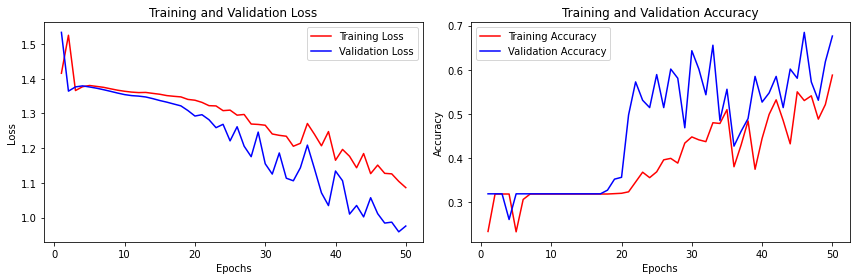

In [54]:
# Loss and accuracy values from model
train_loss = CNN_history.history['loss']
val_loss = CNN_history.history['val_loss']
train_accuracy = CNN_history.history['accuracy']
val_accuracy = CNN_history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

#Plot configuration
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### VGG16 Model

- I decided to try a pre-trained model because they can usually achieve higher accuracy than a model I would be able to train on my own

In [178]:
# Data generator with validation split
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 241 images belonging to 4 classes.


In [179]:
# Checking the class labels order
validation_generator.class_indices

{'train_healthy': 0, 'train_miner': 1, 'train_phoma': 2, 'train_rust': 3}

In [180]:
# Data generator for train data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(64, 64), batch_size=16, class_mode='categorical')

Found 1216 images belonging to 4 classes.


In [222]:
# Checking the class labels order
train_generator.class_indices

{'train_healthy': 0, 'train_miner': 1, 'train_phoma': 2, 'train_rust': 3}

In [185]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))

# Weights of the base model (I changed this from False to True, and it improved accuracy)
for layer in base_model.layers:
    layer.trainable = True

# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

In [ ]:
# Create the final model
#vg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile and fit the model
#vg_model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#vg_history = vg_model.fit(train_generator, epochs=50, validation_data=validation_generator)

### VGG16 Model Output

#### Final training Epoch 50/50:
loss: 0.2531 - accuracy: 0.9104 - val_loss: 0.0784 - val_accuracy: 0.9876

In [190]:
# Save model
#vg_model.save('vg_model2.h5')

In [207]:
# Loading saved final model
from tensorflow.keras.models import load_model
vg_final_model = load_model('models/vg_model.h5')

In [221]:
# Print model summary to see its architecture
print("Model Summary:")
vg_final_model.summary()

# Access training history to see epochs and output
final_history = vg_final_model.history

Model Summary:
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16,

In [ ]:
# Plotting validation curves for VGG16 model
# Break out loss and accuracy values from model
train_loss = vg_history.history['loss']
val_loss = vg_history.history['val_loss']
train_accuracy = vg_history.history['accuracy']
val_accuracy = vg_history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

#Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


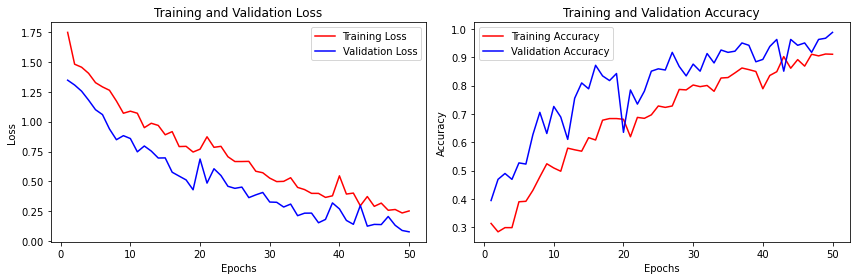

## Results

Here, I am using the VGG16 model to create a confusion matrix based on the predictions from the model.

In [208]:
# Getting predictions for the test images based on the VGG16 model
vg_predictions = vg_final_model.predict(test_generator)

In [209]:
# Labeling the test images
vg_predicted_labels = np.argmax(vg_predictions, axis=1)

In [210]:
vg_final_model.evaluate(test_generator)

13/13 [==============================] - 12s 949ms/step - loss: 17.6814 - accuracy: 0.7500


[17.681371688842773, 0.75]

In [195]:
#vg_cm = confusion_matrix(labels, vg_predicted_labels)

In [211]:
vg_predicted_labels

array([0, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 3, 3,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 3, 2, 3, 2, 0, 0, 1, 3, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 3, 0, 1, 2, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 3, 2, 0,
       1, 0, 2, 3, 0, 0, 3, 3, 2, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 1, 0, 2,
       3, 3, 3, 2, 0, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 3, 3, 1, 0, 2, 3, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 2, 2, 1, 0, 2, 3, 0, 3, 3,
       2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 3, 1,
       0, 3, 0, 1, 0, 2, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 0, 0, 3, 3, 0, 0,
       2, 1, 0, 2, 0, 2, 0, 0, 0, 3, 1, 0, 1, 3, 1, 1, 0, 1, 1, 3, 0, 2,
       2, 0, 1, 3, 1, 3, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       3, 2, 0, 0, 0, 3, 1, 0, 2, 0, 3, 2, 1, 3, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 3, 0, 1, 0, 2, 1, 3, 0, 0, 0,

In [197]:
# Checking labels for file names in test generator
test_generator.filenames

['test_healthy\\1116.jpg',
 'test_healthy\\1117.jpg',
 'test_healthy\\1118.jpg',
 'test_healthy\\1119.jpg',
 'test_healthy\\1124.jpg',
 'test_healthy\\1125.jpg',
 'test_healthy\\1126.jpg',
 'test_healthy\\1127.jpg',
 'test_healthy\\1144.jpg',
 'test_healthy\\1145.jpg',
 'test_healthy\\1146.jpg',
 'test_healthy\\1147.jpg',
 'test_healthy\\1160.jpg',
 'test_healthy\\1161.jpg',
 'test_healthy\\1162.jpg',
 'test_healthy\\1163.jpg',
 'test_healthy\\1164.jpg',
 'test_healthy\\1165.jpg',
 'test_healthy\\1166.jpg',
 'test_healthy\\1167.jpg',
 'test_healthy\\1168.jpg',
 'test_healthy\\1169.jpg',
 'test_healthy\\1170.jpg',
 'test_healthy\\1171.jpg',
 'test_healthy\\1172.jpg',
 'test_healthy\\1173.jpg',
 'test_healthy\\1174.jpg',
 'test_healthy\\1175.jpg',
 'test_healthy\\1176.jpg',
 'test_healthy\\1177.jpg',
 'test_healthy\\1178.jpg',
 'test_healthy\\1179.jpg',
 'test_healthy\\1180.jpg',
 'test_healthy\\1181.jpg',
 'test_healthy\\1182.jpg',
 'test_healthy\\1183.jpg',
 'test_healthy\\1184.jpg',
 

In [213]:
#Final confusion matrix for VGG16 model
final_cm = confusion_matrix(test_labels_final, vg_predicted_labels)

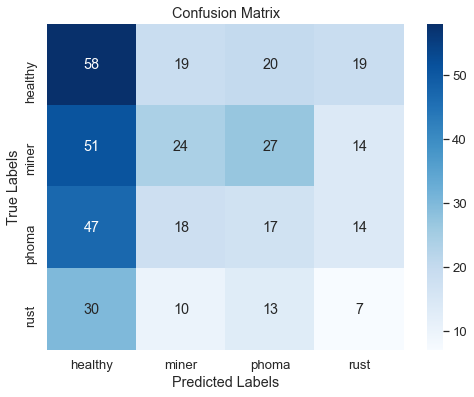

In [214]:
# 4 classes of images
cats = ['healthy', 'miner', 'phoma', 'rust']

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability

# Create a heatmap for confusion matrix
sns.heatmap(final_cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=cats, yticklabels=cats)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Conclusions

Ultimately this model, could be a tool for farmers of coffee crops to be used to identify these three pests/diseases in their plants. Being able to identify pest/disease risk, especially early before they are able to spread to an entire crop has huge benefits to the agricultural business. Economic stability for smaller coffee farms is essential, and being able to sustain a farm is also beneficial for sustainability of the environment. This model could also help farms scale to larger sizes, with it being able to monitor crops that are more than a farmer, especially in remote rural areas, would be able to monitor by eye. Shade grown coffee is a popular method for growing the crop, and it is often done in forest areas that are physically difficult to navigate as often as they would need to be in order to be monitored for pests/disease by indviduals working on the farm. Finally, being able to detect pests and diseases with a model could help to optimize resource allocation for farms, making them more sustainable and even beneficial for the environment.

#### Next Steps

For next steps, I think there are a lot of directions I could go in depending on the feedback from my stakeholders.
1. First, I would create an app to implement the model on real farms and make it really user friendly. 
2. Next, I would scale the model to be used on larger scale farms, which could include creating a system to place monitoring cameras around a farm that would automatically monitor the crop health. 
3. And lastly, I would collect more data and expand to other crop health indicators that can be seen from leaves such as drought stress and nutrient deficiencies. This could create a well rounded monitoring system for crop health in general.